<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/TP_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch17 - Notebook : TP - Intégration et calculs approchés d'aires**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, log, exp

def centrax() :
    '''paramétrage esthétique des axes dans la représentation graphique d'une fonction'''
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    

On cherche une valeur approchée de l'aire sous la courbe de la fonction d'expression $f(x) = x^3 + x^2 + 6x + 5$, entre -3 et 3

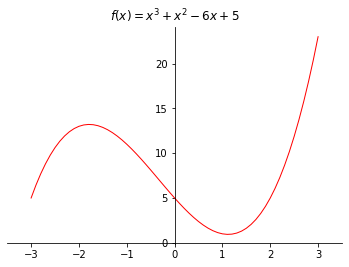

In [2]:
a = -3
b = 3

# Définition de la fonction
def f(x):
    y = x**3 + x**2 -6*x + 5
    return y
titre = ('$f(x) = x^3 + x^2 - 6x + 5$')

# Représentation graphique
def graph(f):
    xx = np.arange(a,b+0.1,0.1) # liste numpy de a à b avec un pas de 0.1 (les listes natives avec range sont des listes d'entiers)
    yy = []

    for x in xx :
        yy.append(f(x))
    
    p1 = plt.plot(xx,yy,'r',linewidth=1)

    centrax()

    plt.xlim(a-0.5,b+0.5)
    plt.title(titre)
    
graph(f)
plt.show()

### 1. méthode des rectangles

**<span style="color: #D17460">TSpé - TCompl </span>**

**<span style="color: #26B260">Python : listes par compréhension</span>**


In [3]:
titre = ('$f(x) = x^3 + x^2 - 6x + 5$')
def rectangles(n):
    pas = (b-a)/n
    Aire = 0

    x = [a + k*pas for k in range(n)] # liste définie par compréhension
    Rectangles = [pas*f(x[k]) for k in range(n)]
    S = sum(Rectangles) #somme des termes de la liste 'Rectangles'
    return S


In [4]:
rectangles((b-a)*5) #unité divisée en 5

46.24000000000001

In [5]:
rectangles((b-a)*100)

47.910100000000035

In [6]:
rectangles((b-a)*100000) 

47.999910000102716

**_illustration graphique pour l'unité subdivisée en 2_**

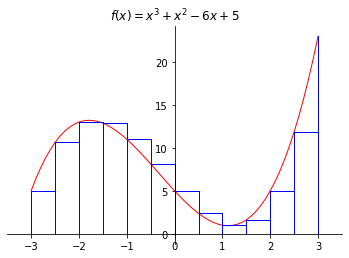

Aire estimée :  43.75


In [7]:
graph(f)

n = (b-a)*2
pas = (b-a)/n
x = [a + k*pas for k in range(n)]

for k in range(n-1) :
    plt.plot([x[k],x[k]],[0,f(x[k])], 'b',linewidth = 1 )
    if f(x[k]) > f(x[k+1]) :
        plt.plot([x[k+1],x[k+1]],[0,f(x[k])], 'b',linewidth = 1 )
    plt.plot([x[k],x[k+1]],[f(x[k]),f(x[k])], 'b',linewidth = 1)
    
plt.plot([x[-1],x[-1]],[0,f(x[-1])], 'b',linewidth = 1 ) 
plt.plot([x[-1],b],[f(x[-1]),f(x[-1])], 'b',linewidth = 1 )
plt.plot([b,b],[0,f(b)], 'b',linewidth = 1 )  

plt.show()

print('Aire estimée : ', rectangles(n))


### 2. méthode des trapèzes

**<span style="color: #D17460">TSpé </span>**


In [8]:
def trapezes(n):
    pas = (b-a)/n
    Aire = 0

    x = [a + k*pas for k in range(n+1)] # liste définie par compréhension
    Trapezes = [pas*(f(x[k])+f(x[k+1]))/2 for k in range(n)]
    S = sum(Trapezes) 
    return S

In [9]:
trapezes((b-a)*5)

48.040000000000006

In [10]:
trapezes((b-a)*100)

48.0001

In [11]:
trapezes((b-a)*100000)

48.00000000009952

**_illustration graphique pour l'unité subdivisée en 2_**

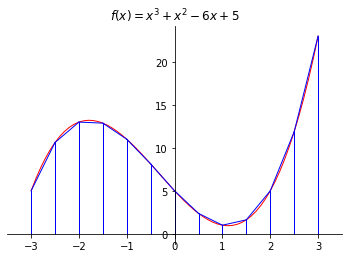

Aire estimée :  48.25


In [12]:
graph(f)

n = (b-a)*2
pas = (b-a)/n
x = [a + k*pas for k in range(n+1)]

for k in range(n) :
    plt.plot([x[k],x[k]],[0,f(x[k])], 'b',linewidth = 1 )
    plt.plot([x[k],x[k+1]],[f(x[k]),f(x[k+1])], 'b',linewidth = 1)
    
#plt.plot([x[-1],x[-1]],[0,f(x[-1])], 'b',linewidth = 1 ) 
#plt.plot([x[-1],b],[f(x[-1]),f(x[-1])], 'b',linewidth = 1 )
plt.plot([b,b],[0,f(b)], 'b',linewidth = 1 )  

plt.show()

print('Aire estimée : ', trapezes(n))

### 3. méthode des milieux

**<span style="color: #D17460">TSpé </span>**


In [13]:
def milieux(n):
    pas = (b-a)/n
    Aire = 0

    x = [a + k*pas for k in range(n+1)] # liste définie par compréhension
    RectanglesMilieux = [pas*f((x[k]+x[k+1])/2) for k in range(n)]
    S = sum(RectanglesMilieux) 
    return S

In [14]:
milieux((b-a)*5)

47.98000000000002

In [15]:
milieux((b-a)*100)

47.99994999999999

In [16]:
milieux((b-a)*100000)

47.99999999995055

**_illustration graphique pour l'unité subdivisée en 2_**

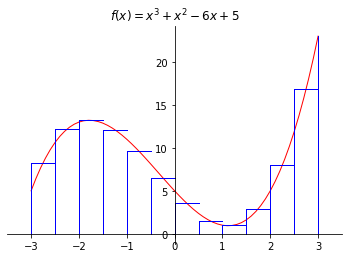

Aire estimée :  47.875


In [17]:
graph(f)

n = (b-a)*2
pas = (b-a)/n
x = [a + k*pas for k in range(n+1)]

for k in range(n) :
    plt.plot([x[k],x[k]],[0,f((x[k]+x[k+1])/2)], 'b',linewidth = 1 )
    plt.plot([x[k],x[k+1]],[f((x[k]+x[k+1])/2),f((x[k]+x[k+1])/2)], 'b',linewidth = 1)
    
#plt.plot([x[-1],x[-1]],[0,f(x[-1])], 'b',linewidth = 1 ) 
#plt.plot([x[-1],b],[f(x[-1]),f(x[-1])], 'b',linewidth = 1 )
plt.plot([b,b],[0,f(b)], 'b',linewidth = 1 )  

plt.show()

print('Aire estimée : ', milieux(n))

### 4. Une méthode utilisant l'aléatoire : la méthode de Monte-Carlo

**<span style="color: #D17460">TSpé - TCompl </span>**

**<span style="color: #26B260">Python : aléatoire avec le module random, passage d'une fonction en parmamètre d'une fonction !!!</span>**

On encadre la courbe par un rectangle (ici : abscisses entre -3 et 3, ordonnées entre 0 et la valeur maximale de f sur l'intervalle).

On tire des "fléchettes aléatoires" dans ce rectangle, la proportion d'entre elles tombant en-dessous de la courbe donne une valeur approchée de la proportion de l'aire cherchée par rapport à celle du rectangle.

In [18]:
from random import uniform

# recherche du maximum de f sur [a;b]
x_du_max = a
xx = np.arange(a,b+0.1,0.1)

for x in xx:
    if f(x)>f(x_du_max):
        x_du_max = x
y_max = f(x_du_max)

# définition de la fonction MonteCarlo et représenttion de la simulation
def monte_carlo(f,N):
    graph(f)
    sous_la_courbe = 0
    for k in range(N+1):
        x_point = uniform(a,b) # effectue un tirage aléatoire selon la loi uniforme continue sur [a;b]
        y_point = uniform(0,y_max)
        if y_point < f(x_point):
            sous_la_courbe = sous_la_courbe + 1
            plt.plot(x_point,y_point,'g',marker = '+') # croix verte
        else :
            plt.plot(x_point,y_point,'r',marker = '+') # croix rouge
       
    plt.show()
    return sous_la_courbe / N
    


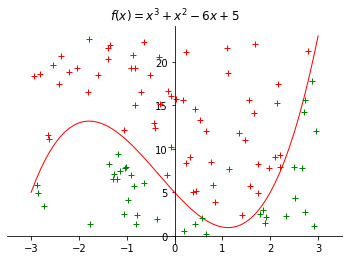

Aire estimée :  52.44000000000034


In [19]:
prop = monte_carlo(f,100)

print('Aire estimée : ', prop * (b-a)*y_max)

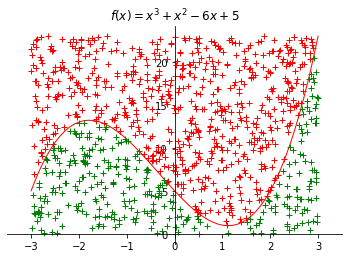

Aire estimée :  45.678000000000296


In [20]:
prop = monte_carlo(f,1000)

print('Aire estimée : ', prop * (b-a)*y_max)

**_Exercice_**

Adapter les méthodes ci-dessus au calcul de $\int_{-1}^{1} \sqrt{1-x^2} dx$ pour obtenir des valeurs approchées de $\pi$

**<span style="color: #D17460">1Spé : aire sous la courbe, estimation de $\pi$ par la méthode de Monte Carlo </span>**

**_Remarque_**

**<span style="color: #26B260">Python : lambda-fonction</span>**

Comme on peut passer la fonction intégrée en paramètre, on peut faire usage d'une lamba-fonction :


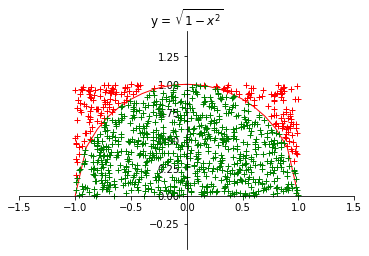

Aire estimée :  3.216


In [21]:
a = -1
b = 1
titre = 'y = $\sqrt{1-x^2}$'
g = lambda x: sqrt(1-x*x)
plt.axis('equal') # repère orthonormé

# recherche du maximum de f sur [a;b]
x_du_max = a
xx = np.arange(a,b+0.1,0.1)

for x in xx:
    if g(x)>g(x_du_max):
        x_du_max = x
y_max = g(x_du_max)

prop = monte_carlo(lambda x: sqrt(1-x*x), 1000)

print('Aire estimée : ', 2*prop * 2)